In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from utility.data_generator import make_multitarget_regression, scores_generator
from utility.rectangle import Rectangle
from utility.lpr import one_rect_prediction_regions_nD, mean_index_solver
from utility.npr import no_scaling_prediction_region
from utility.ds import data_splitting_prediction_region
from utility.graphing_tools import graphing_tools_2D



# Data generation

In [2]:
# 2-dim data, n=500
X, y = make_multitarget_regression(n_samples=200, n_features=10, n_informative= 10, n_targets=2, noise_list=[4, 1], random_state=88)
scores_cal, scores_test = scores_generator(X, y)

In [3]:
# Compute prediction regions
reg_ds = data_splitting_prediction_region(scores_cal, 0.2)
reg_npr = no_scaling_prediction_region(scores_cal, 0.2)
reg_lpro = one_rect_prediction_regions_nD(scores_cal, 0.2)
regs_lpr, reg_lpr = one_rect_prediction_regions_nD(scores_cal, 0.2, False)

In [4]:
vol_regs_lpr = 0
for reg in regs_lpr:
    vol_regs_lpr += reg.volume()

# Illustrations generation

In [5]:
table_arr = [["DS", reg_ds.lower, reg_ds.upper, reg_ds.volume()],
            ["NPR", reg_npr.lower, reg_npr.upper, reg_npr.volume()],
            ["LPR-O", reg_lpro.lower, reg_lpro.upper, reg_lpro.volume()],
            ["LPR-One_rect", reg_lpr.lower, reg_lpr.upper, reg_lpr.volume()],
            ["LPR", None, None, vol_regs_lpr]]
column_labels = ["Method Name", "Lower Corner", "Upper Corner", "Volume"]
table = pd.DataFrame(table_arr, columns=column_labels)

In [6]:
latex_table = table.to_latex(index=False, caption="Prediction Region by Methods", label="tab:n=50, d=2")
with open("illustrations_in_paper/n20_d2.tex", "w") as f:
    f.write(latex_table)

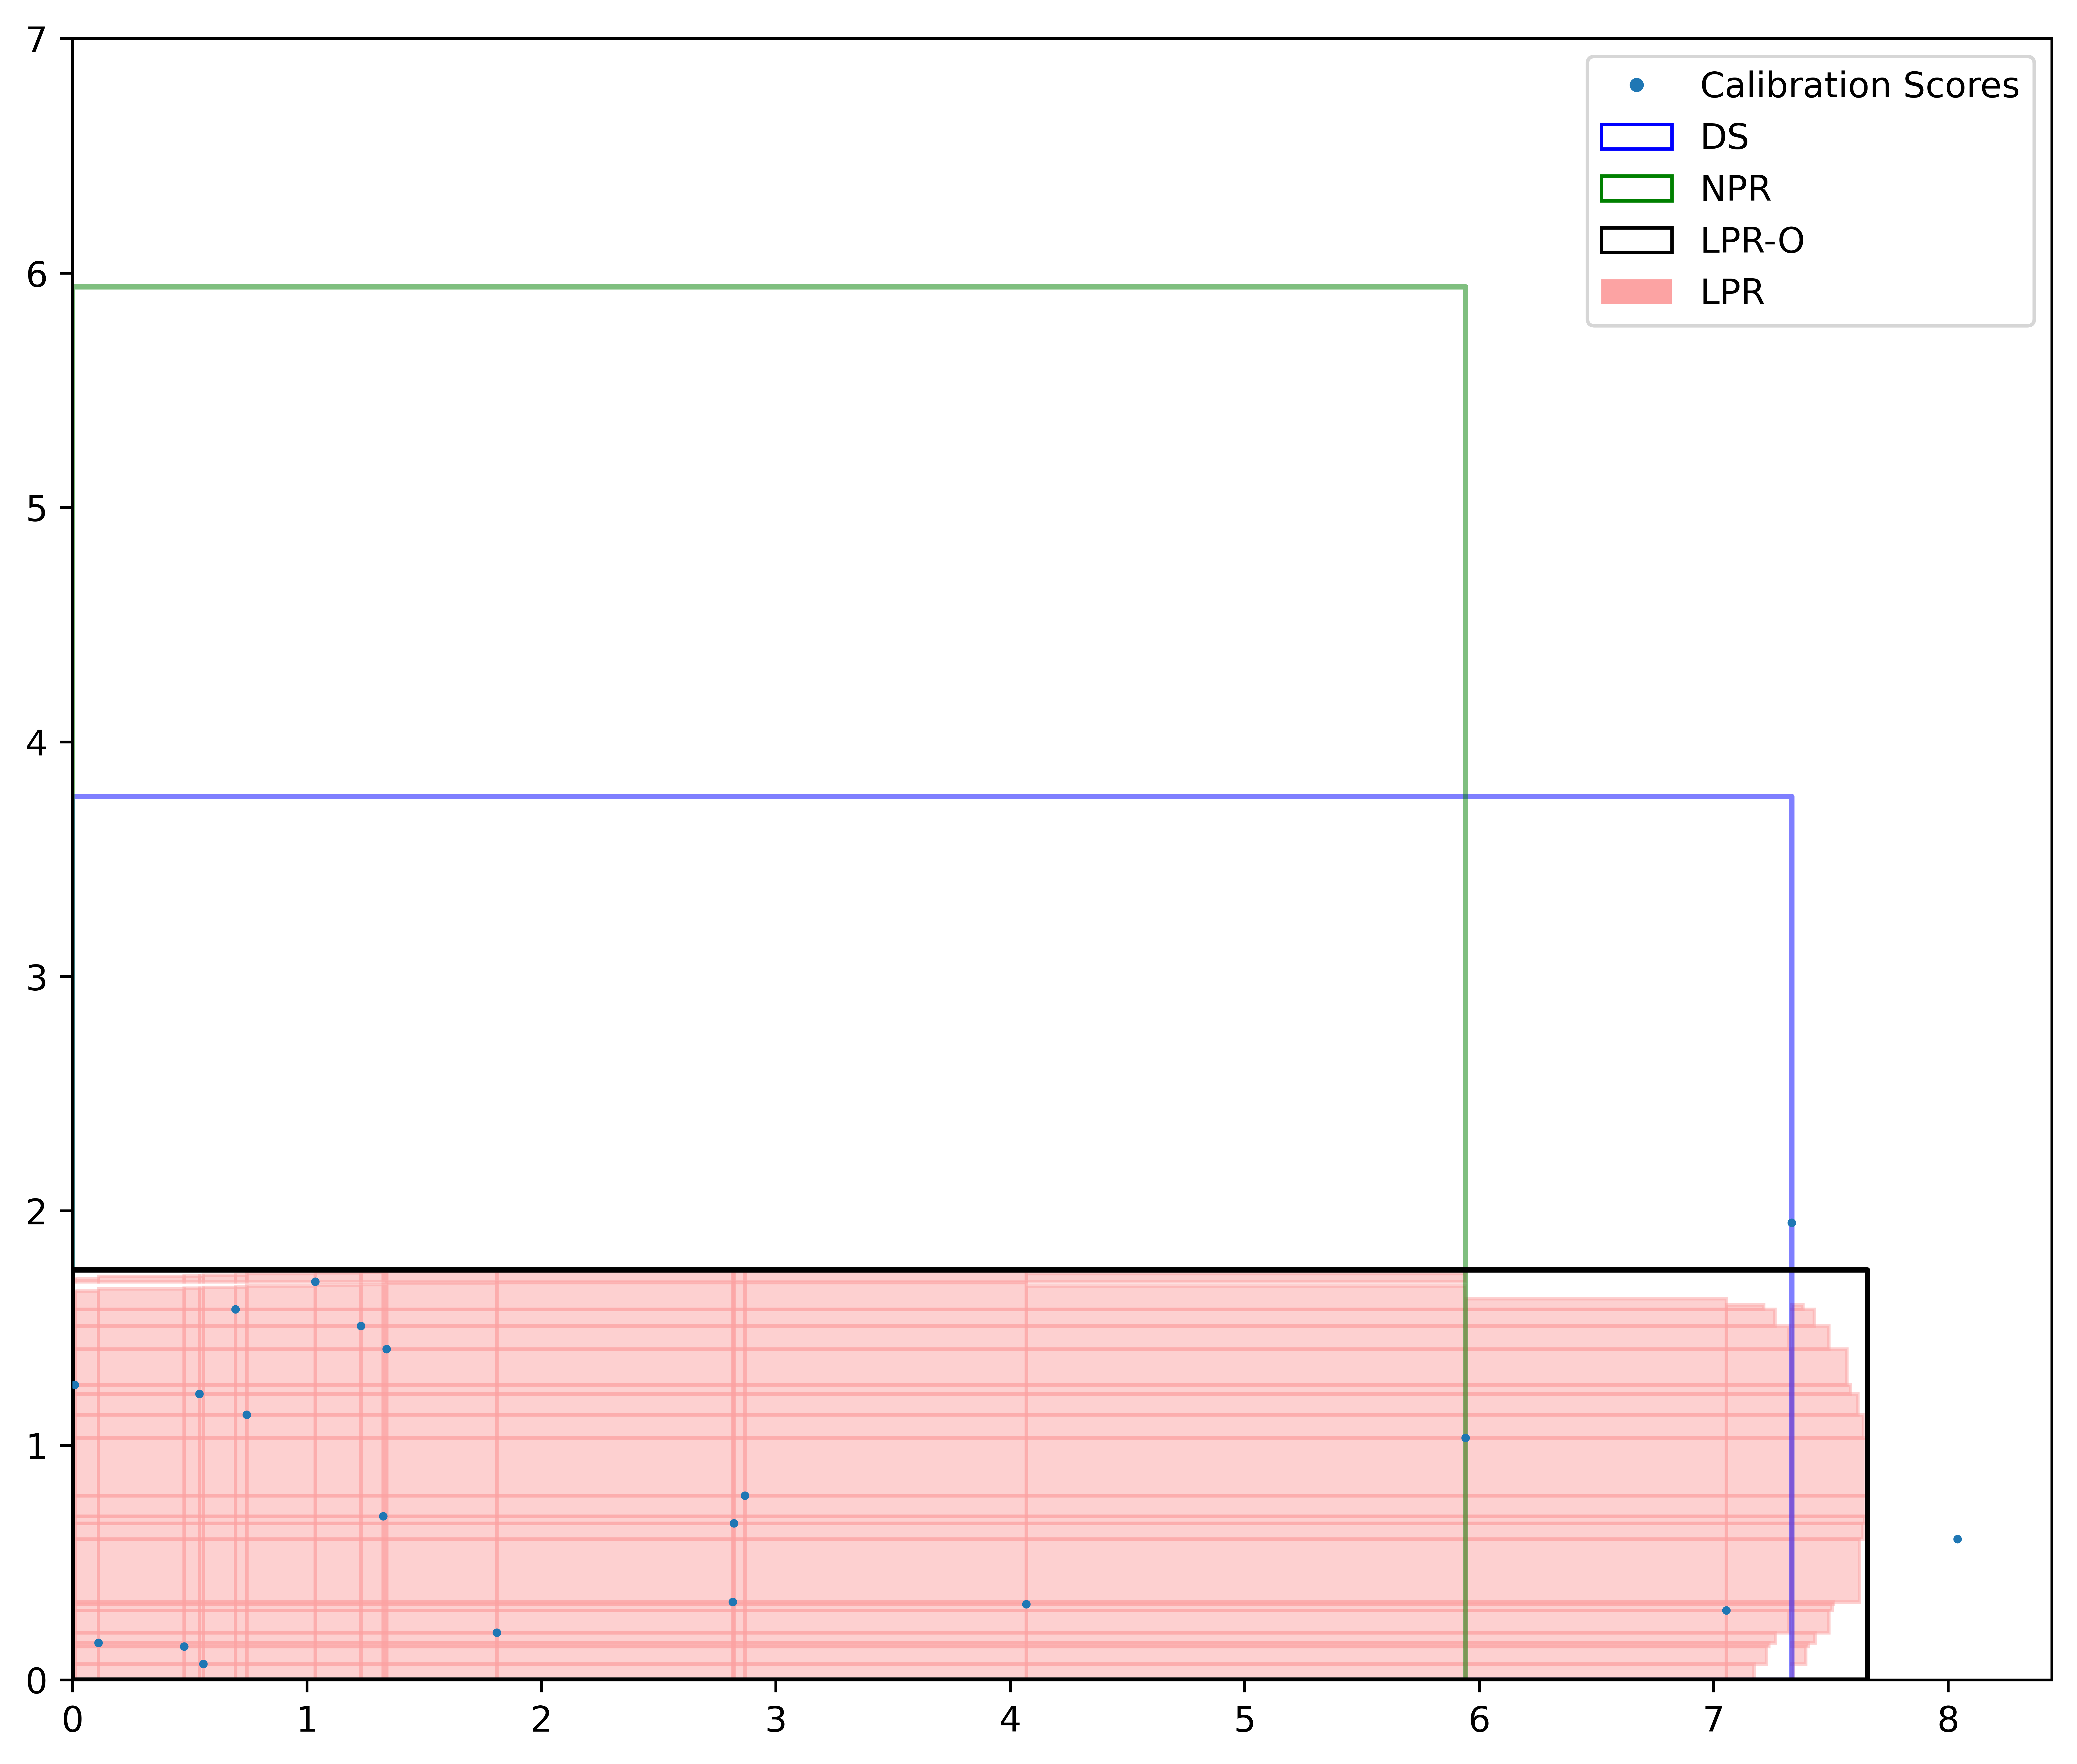

In [31]:
# Illustration of NPR and DS
fig, ax = plt.subplots(1, 1, figsize = (12, 7), dpi = 900)
reg_ds.draw_2D(ax, boundary_color="Blue", fill_color="None")
graphing_tools_2D(ax, scores_cal, regions=regs_lpr, rectangle=reg_npr, rectangle_boundary_color="Green", rectangle_fill_color="None")
reg_lpro.draw_2D(ax, fill_color="None", boundary_color="Black", transparancy=1)
ax.set_ylim([0, 7])
score_legend = Line2D([0], [0], marker='o', color='w', label='Calibration Scores',
                        markerfacecolor="#1f77b4", markersize=5)
LPR_legend = Patch(facecolor="#fca3a3", edgecolor='none', label="LPR")
LPRO_legend = Patch(facecolor="None", edgecolor="Black", label="LPR-O")
NPR_legend = Patch(facecolor="None", edgecolor="Green", label="NPR")
DS_legend = Patch(facecolor="None", edgecolor="Blue", label="DS")
ax.legend(handles=[score_legend, DS_legend, NPR_legend, LPRO_legend, LPR_legend], loc="upper right")
fig.savefig("illustrations_in_paper/NPR_DS_LPR_prediction_region.pdf", dpi=900, bbox_inches="tight")

In [8]:
small_samples = pd.read_csv("experiments_synthetic/interesting_small_exps/small_samples.csv", index_col=0).drop(columns=["coverage_cal"])
latex_small_samples = small_samples.to_latex(index=False, caption="Prediction Region by Methods", label="tab:n=50, d=2")
with open("illustrations_in_paper/n20_d2_1000.tex", "w") as f:
    f.write(latex_small_samples)

In [9]:
mean_index0 = mean_index_solver(scores_cal)
col_base = [np.sort(scores_cal, axis = 0)[mean_index0[0]][0], np.sort(scores_cal, axis = 0)[mean_index0[0]+1][0]]
row_base = [np.sort(scores_cal, axis = 0)[mean_index0[1]][1], np.sort(scores_cal, axis = 0)[mean_index0[1]+1][1]]
col_rect = Rectangle(upper=[col_base[1], reg_lpro.upper[1]], lower=[col_base[0], 0])
row_rect = Rectangle(upper=[reg_lpro.upper[0], row_base[1]], lower=[0, row_base[0]])
# Common colors and styles
highlight_color = "#2ca02c"     # Softer green
region_color = "#fca3a3"        # Light red
arrow_style = dict(arrowstyle="->", color='black', lw=1.5)

# Legend elements
score_legend = Line2D([0], [0], marker='o', color='w', label='Calibration Scores',
                      markerfacecolor="#1f77b4", markersize=6)
region_legend = Patch(facecolor=region_color, edgecolor='none', label="LPR")
rect_legend = Patch(facecolor=highlight_color, edgecolor='none', label="Search area")

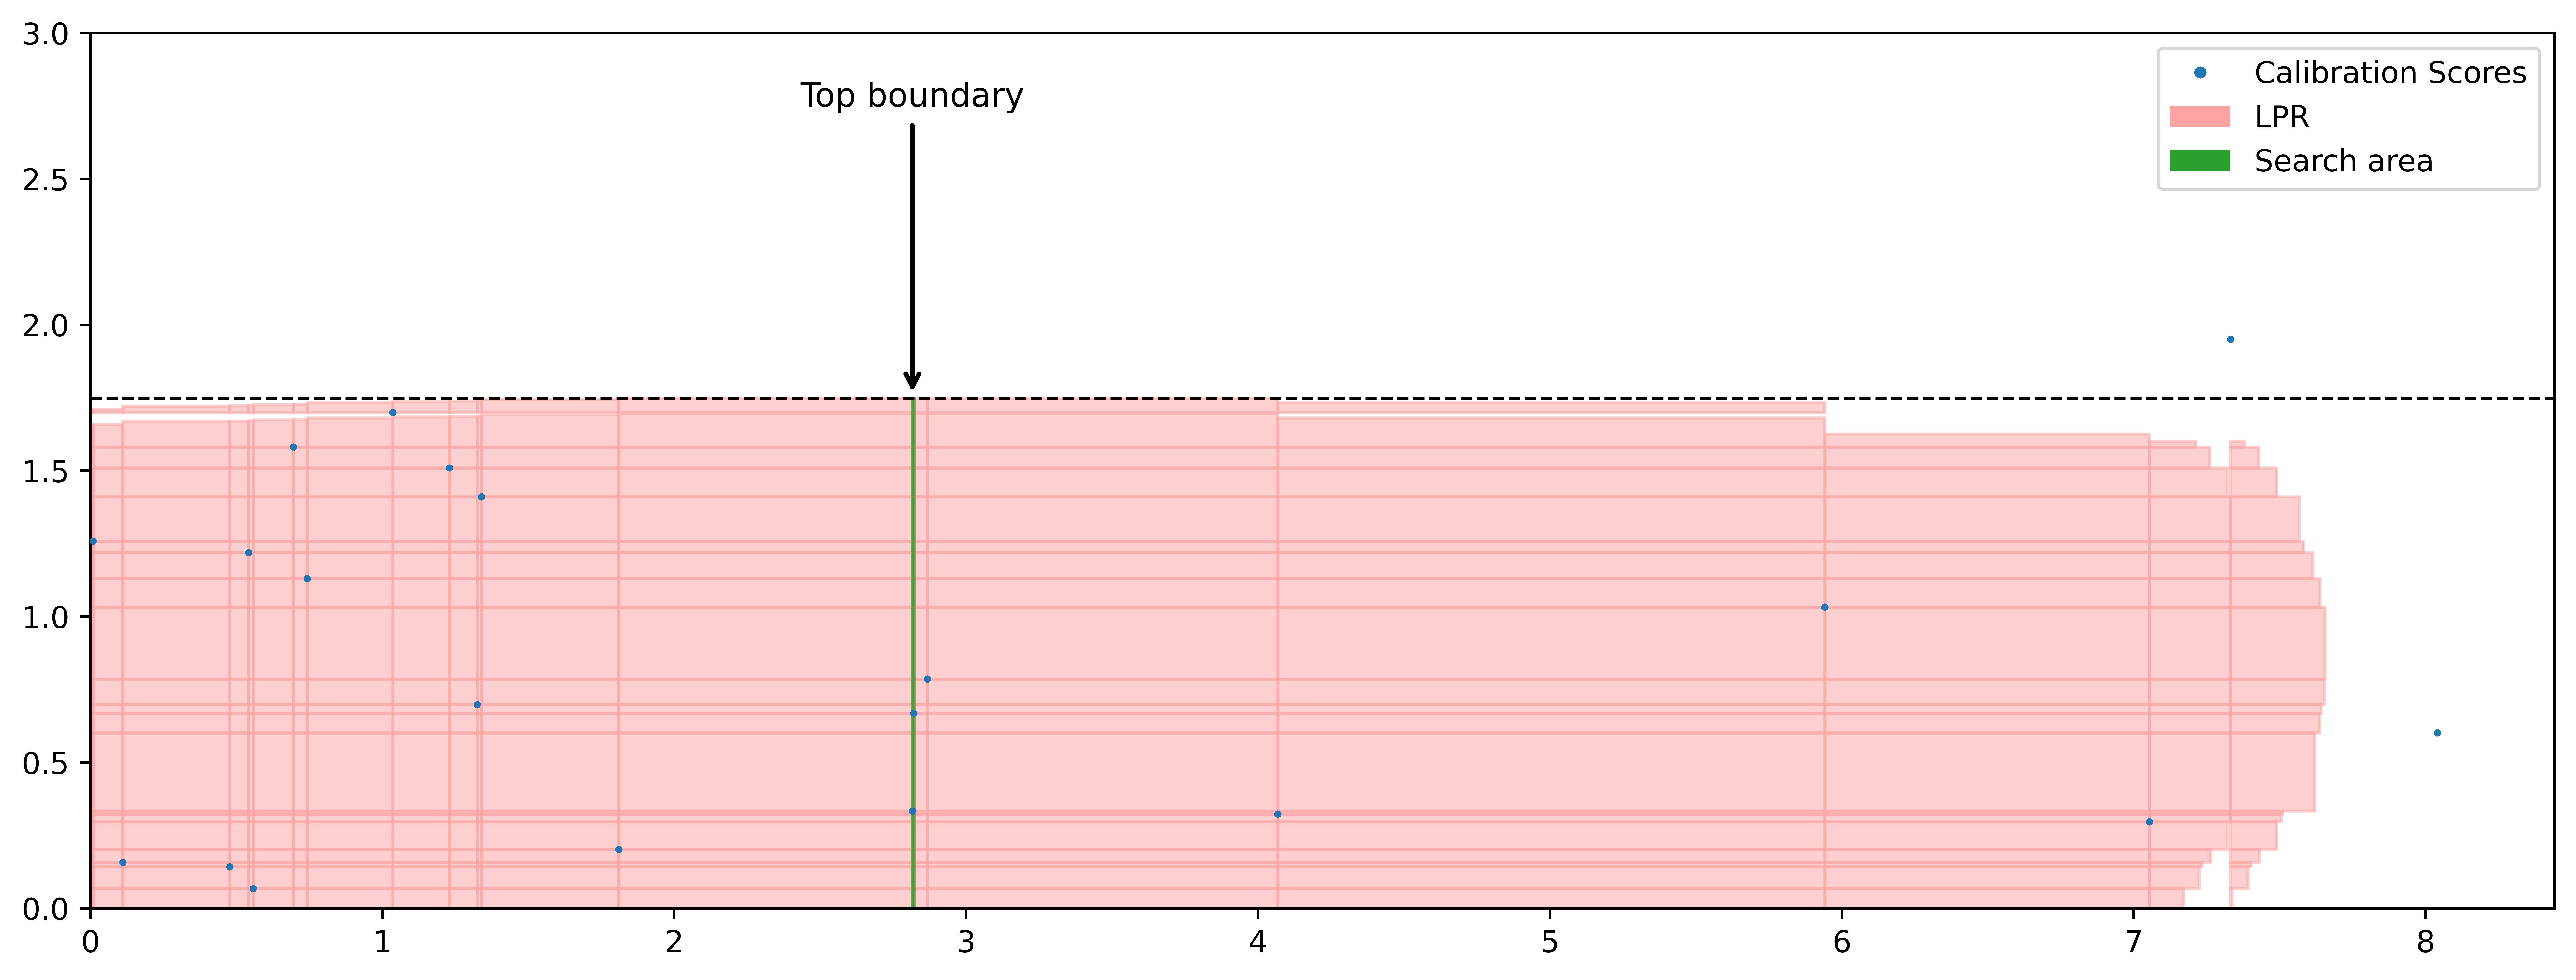

In [32]:
# Vertical search
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=900)

graphing_tools_2D(ax, scores_cal, regions=regs_lpr)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim([0,3])

# --- Panel 1: Vertical Search ---
col_rect.draw_2D(ax, boundary_color=None, fill_color=highlight_color, transparancy=0.7)
ax.axhline(reg_lpr.upper[1], color="black", linestyle="--", lw=1)
ax.annotate("Top boundary", 
    xy=(col_base[0], reg_lpr.upper[1]), 
    xytext=(col_base[0], reg_lpr.upper[1] + 1),
    arrowprops=arrow_style, fontsize=11, ha='center')
ax.legend(handles=[score_legend, region_legend, rect_legend], loc="upper right")
plt.tight_layout()

fig.savefig("illustrations_in_paper/vertical_search.pdf", dpi = 900, bbox_inches="tight")

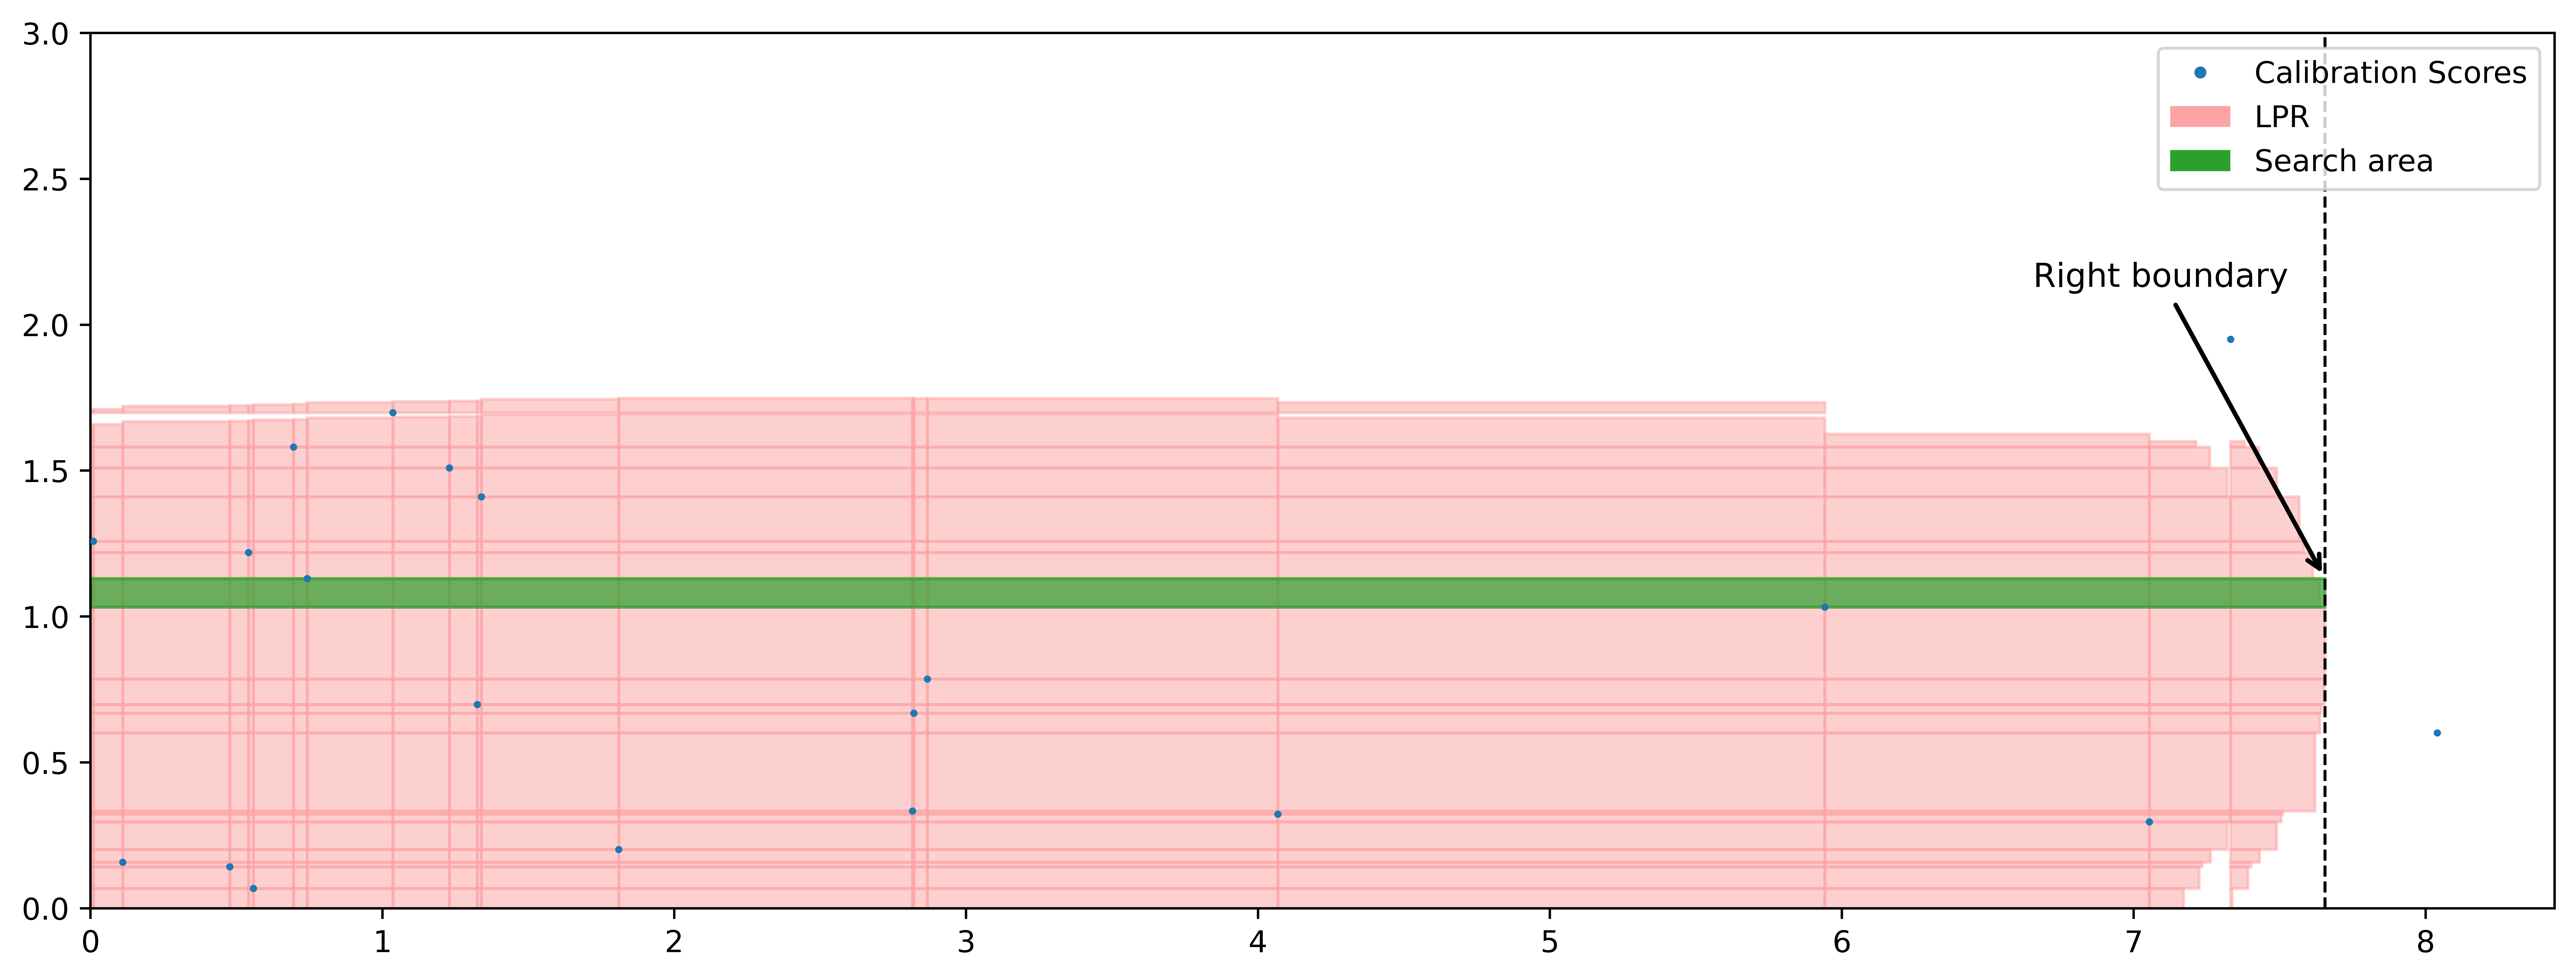

In [33]:
# Horizontal search
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=900)

graphing_tools_2D(ax, scores_cal, regions=regs_lpr)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim([0,3])

# --- Panel 2: Horizontal Search ---
row_rect.draw_2D(ax, boundary_color=None, fill_color=highlight_color, transparancy=0.7)
ax.axvline(reg_lpr.upper[0], color="black", linestyle="--", lw=1)
ax.annotate("Right boundary", 
    xy=(reg_lpr.upper[0], row_base[1]), 
    xytext=(reg_lpr.upper[0] -1, row_base[1] + 1),
    arrowprops=arrow_style, fontsize=11, ha='left')
ax.legend(handles=[score_legend, region_legend, rect_legend], loc="upper right")
plt.tight_layout()

fig.savefig("illustrations_in_paper/horizontal_search.pdf", dpi = 900, bbox_inches="tight")

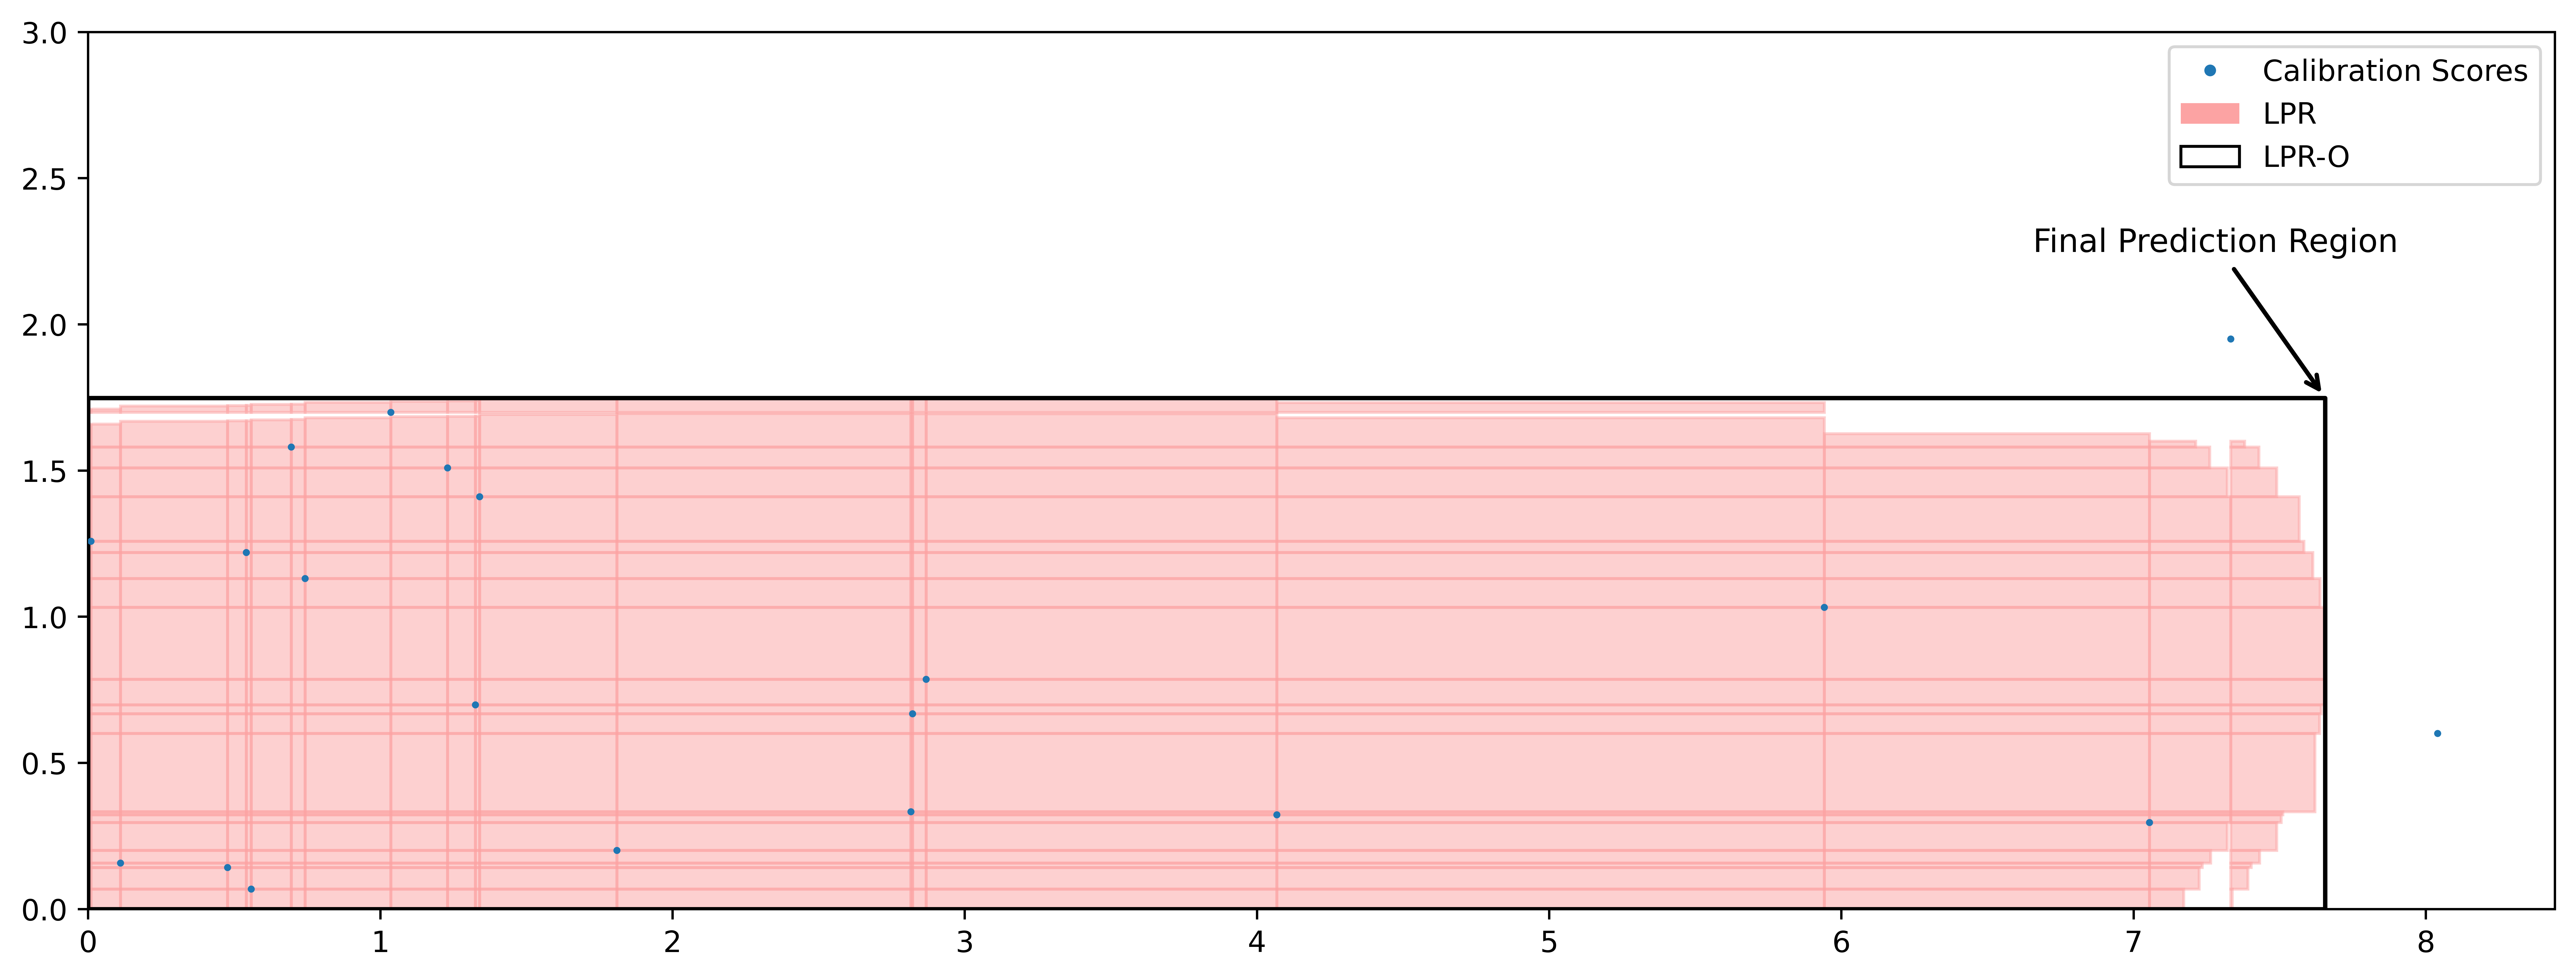

In [34]:
# Horizontal search
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=900)

graphing_tools_2D(ax, scores_cal, regions=regs_lpr)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylim([0,3])

# --- Panel 3: Final Region ---
reg_lpr.draw_2D(ax, boundary_color="black", fill_color=None, transparancy=1)
ax.annotate("Final Prediction Region",
    xy=(reg_lpr.upper[0], reg_lpr.upper[1]),
    xytext=(reg_lpr.upper[0] - 1, reg_lpr.upper[1] + 0.5),
    arrowprops=arrow_style, fontsize=11, ha='left')
LPRO_legend = Patch(facecolor="None", edgecolor="Black", label="LPR-O")
ax.legend(handles=[score_legend, region_legend, LPRO_legend], loc="upper right", fontsize=10)

fig.savefig("illustrations_in_paper/LPRO.pdf", dpi = 900, bbox_inches="tight")